In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.load('/fastio2/dasha/double_pulse/data.npy', mmap_mode='r')

In [4]:
data = data.reshape(data.shape[0])

In [5]:
dist2d = []
for e in data:
    d = np.sqrt((e['cog'][0]-e['st_pos'][0])**2+(e['cog'][1]-e['st_pos'][1])**2)
    dist2d.append(d)
dist2d = np.array(dist2d)
print(dist2d.shape, dist2d[:5])

(1476948,) [122.15231893  17.11962807  52.27534127   8.88416121  41.80016799]


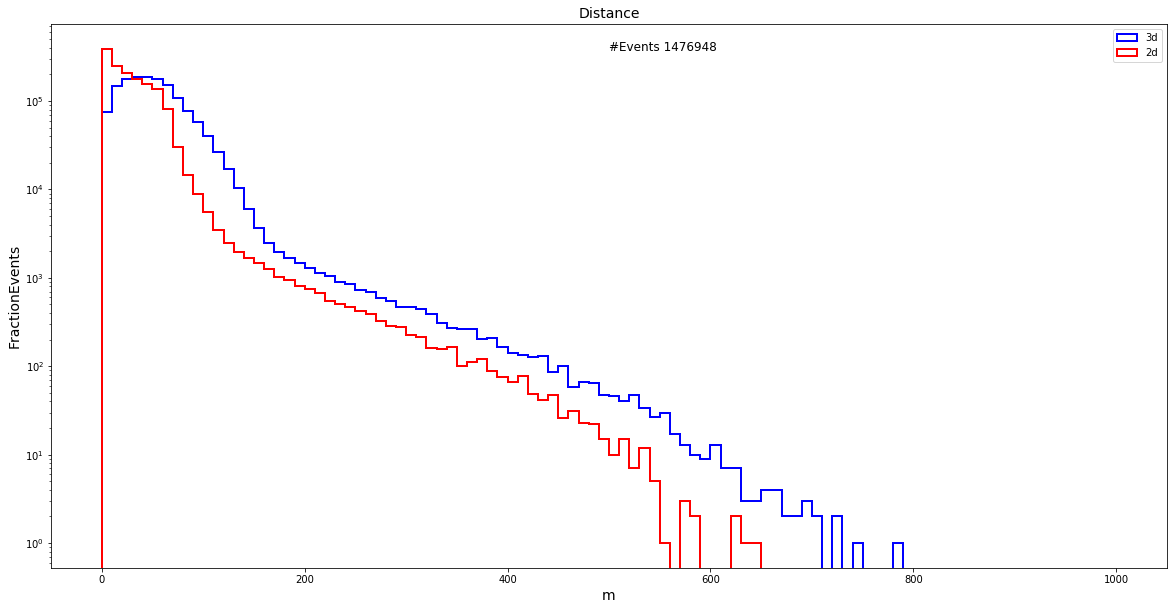

In [6]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['distance'], bins =100, histtype = 'step', edgecolor ='b', lw =2, range = [0,10**3], label = "3d")  
ax.hist(dist2d, bins =100, histtype = 'step', edgecolor ='r', lw =2, range = [0,10**3], label = "2d")  
plt.legend()
plt.show()

In [7]:
sbang = []
for i in data:
    spos = np.zeros(3)
    pos = i['meson']['position']
    di = i['meson']['direction']
    leng = i['meson']['length']
    spos[0] = pos[0]+np.sin(di[0])*np.cos(di[1])*leng
    spos[1] = pos[1]+np.sin(di[0])*np.sin(di[1])*leng
    spos[2] = pos[2]+np.cos(di[0])*leng
    sbang.append(spos)
sbang = np.array(sbang)
print(sbang.shape)

(1476948, 3)


In [10]:
c_data = []
c_sbang = []
c_dist2d = []

for i,e in enumerate(data):
    if np.all(e['meson']['position'] < 500, axis =0) & np.all(e['meson']['position'] > - 500, axis =0) & np.all(sbang[i] < 500, axis =0) & np.all(sbang[i] > - 500, axis =0):
        c_data.append(e)
        c_sbang.append(sbang[i])
        c_dist2d.append(dist2d[i])
c_data = np.array(c_data)
c_sbang = np.array(c_sbang)
c_dist2d = np.array(c_dist2d)
print(c_data.shape,c_sbang.shape,c_dist2d.shape)

(1010725,) (1010725, 3) (1010725,)


In [11]:
w = np.ones(data.shape[0])/data.shape[0]
wc = np.ones(c_data.shape[0])/c_data.shape[0]

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['distance'], bins =100, histtype = 'step', weights = w, edgecolor ='b', lw =2, range = [0,10**3], label = "3d")  
ax.hist(dist2d, bins =100, histtype = 'step',  weights = w, edgecolor ='r', lw =2, range = [0,10**3], label = "2d")  
ax.hist(c_data['distance'], bins =100, histtype = 'step',  weights = wc, edgecolor ='b', ls = '--', lw =2, range = [0,10**3], label = "3d_cont")  
ax.hist(c_dist2d, bins =100, histtype = 'step',  weights = wc, edgecolor ='r', lw =2, ls = '--', range = [0,10**3], label = "2d_cont")  

plt.legend()
plt.show()

In [22]:
print(data.shape, c_data.shape)
l = data.shape[0]
cl = c_data.shape[0]
ld = len([i for i in dist2d if i >200])
cld = len([i for i in c_dist2d if i >200])
print(ld/l*100, cld/cl*100)

(1476948,) (1010725,)
0.4430081492374816 0.20826634346632367


In [20]:
lardis = []
for i, row in enumerate(c_data):
    if c_dist2d[i] > 200:
        lardis.append([row['id'][0],row['id'][1],row['id'][2],row['id'][3],row['cog'][0],row['cog'][1],row['cog'][2],row['st_pos'][0],row['st_pos'][1],row['st_pos'][2]])
lardis = np.array(lardis)
print(lardis.shape)
print(lardis[:10])

(2105, 10)
[[ 6.01100000e+03  4.29496730e+09  2.66000000e+02  0.00000000e+00
  -2.44320145e+02  4.73335991e+01 -5.59647484e+01 -4.37040009e+02
   2.17800003e+02  5.89257889e+01]
 [ 6.01200000e+03  4.29496730e+09  3.76000000e+02  0.00000000e+00
  -7.86952667e+01  2.92218445e+02 -4.01053070e+02 -2.68899994e+02
   3.54239990e+02 -4.09092499e+02]
 [ 6.01400000e+03  4.29496730e+09  2.76000000e+02  0.00000000e+00
   4.71461182e+01 -2.75403778e+02  2.44015778e+02 -2.56140015e+02
  -5.21080017e+02  2.83270721e+02]
 [ 6.03300000e+03  4.29496730e+09  6.02000000e+02  0.00000000e+00
   1.74864578e+02 -1.02683350e+02  1.87883621e+02 -4.32700005e+01
  -2.67519989e+02  2.43917892e+02]
 [ 6.03700000e+03  4.29496730e+09  2.67000000e+02  0.00000000e+00
  -5.28063126e+01 -1.74739273e+02 -1.41280060e+02 -3.24390015e+02
  -9.34300003e+01 -3.23670013e+02]
 [ 6.03700000e+03  4.29496730e+09  6.21000000e+02  0.00000000e+00
  -8.56135941e+01  2.66044434e+02 -2.27909302e+02 -2.68899994e+02
   3.54239990e+02 -1.0

In [21]:
np.save('/home/dup193/work/double_pulse/large_dist_3.npy', lardis)